# Importing Necessary Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Upload your kaggle.json as before:
from google.colab import files
files.upload()

# Setup credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download competition data
!kaggle competitions download -c tabular-playground-series-dec-2021

# Unzip it
!unzip tabular-playground-series-dec-2021.zip


Saving kaggle.json to kaggle.json
 92% 116M/126M [00:00<00:00, 1.21GB/s]
100% 126M/126M [00:00<00:00, 1.14GB/s]
Archive:  tabular-playground-series-dec-2021.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

train_df.head()


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,0,3189,40,8,30,13,3270,206,234,193,...,0,0,0,0,0,0,0,0,0,1
1,1,3026,182,5,280,29,3270,233,240,106,...,0,0,0,0,0,0,0,0,0,2
2,2,3106,13,7,351,37,2914,208,234,137,...,0,0,0,0,0,0,0,0,0,1
3,3,3022,276,13,192,16,3034,207,238,156,...,0,0,0,0,0,0,0,0,0,2
4,4,2906,186,13,266,22,2916,231,231,154,...,0,0,0,0,0,0,0,0,0,2


In [ ]:
train_df = train_df.sample(n=10000, random_state=42)


In [ ]:
train_df.shape


(10000, 56)

In [ ]:
train_df=train_df.drop(['Soil_Type20','Soil_Type21','Soil_Type22','Soil_Type23','Soil_Type24','Soil_Type25','Soil_Type26','Soil_Type27','Soil_Type28','Soil_Type29','Soil_Type30','Soil_Type31','Soil_Type32','Soil_Type33','Soil_Type34','Soil_Type35','Soil_Type36','Soil_Type37','Soil_Type38','Soil_Type39','Soil_Type40'],axis=1)

In [ ]:
train_df.shape


(10000, 35)

In [ ]:
train_df.isnull().any()

,0
Id,False
Elevation,False
Aspect,False
Slope,False
Horizontal_Distance_To_Hydrology,False
Vertical_Distance_To_Hydrology,False
Horizontal_Distance_To_Roadways,False
Hillshade_9am,False
Hillshade_Noon,False
Hillshade_3pm,False


In [ ]:
X = train_df.drop(columns=['Cover_Type', 'Id'])
y = train_df['Cover_Type']

# Normalize and Split

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


l = LabelEncoder()
y= l.fit_transform(y)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
print("XGBoost Classification Report:\n", classification_report(y_val, y_pred))

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:15:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.93       741
           1       0.94      0.94      0.94      1109
           2       0.72      0.65      0.68       102
           3       0.00      0.00      0.00         1
           4       0.33      0.02      0.04        47

    accuracy                           0.91      2000
   macro avg       0.58      0.51      0.52      2000
weighted avg       0.90      0.91      0.90      2000



# Confusion Matrix

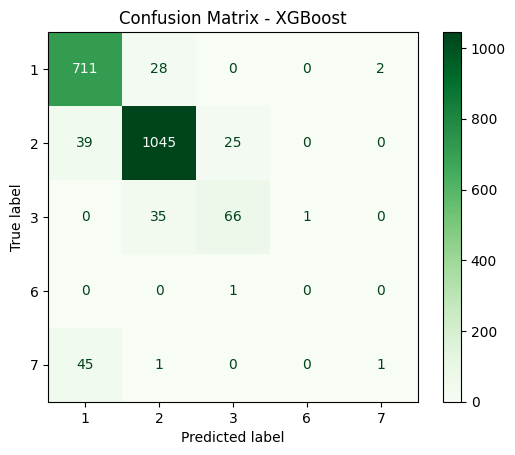

In [ ]:
cm_xgb = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=l.inverse_transform(np.unique(y_val)))
disp.plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix - XGBoost")
plt.show()